In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib as mpl
from collections import Counter
import matplotlib.patches as mpatches
import plotly.plotly as py
sns.set_style("white")

In [3]:
plt.rcParams['axes.labelsize']=16.
plt.rcParams['xtick.labelsize']=14.
plt.rcParams['ytick.labelsize']=14.
plt.rcParams['legend.fontsize']=12.
plt.rcParams['figure.figsize']=[15.,6.]

In [4]:
battles=pd.read_csv('C://Users/DELL/Anaconda3/Datasets/Game-of-Thrones-Dataset/battles.csv')
character_deaths=pd.read_csv('C://Users/DELL/Anaconda3/Datasets/Game-of-Thrones-Dataset/character-deaths.csv')
character_predictions=pd.read_csv('C://Users/DELL/Anaconda3/Datasets/Game-of-Thrones-Dataset/character-predictions.csv')

In [5]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [6]:
battles.loc[:,'defenderSize']=4-battles[['defender_1','defender_2','defender_3','defender_4']].isnull().sum(axis=1)

In [7]:
battles.loc[:,'attackerSize']=4-battles[['attacker_1','attacker_2','attacker_3','attacker_4']].isnull().sum(axis=1)

In [8]:
battles[['defenderSize','attackerSize']].head()

,defenderSize,attackerSize
0,1,1
1,1,1
2,1,1
3,1,1
4,1,2


In [9]:
for _ in battles['attacker_commander']:
    if(pd.isnull(_)):
        print ('gotcha')
        

gotcha


In [10]:
#battles['attacker_commander']=battles['attacker_commander'].fillna('')
#battles['attacker_commander']=battles['attacker_commander']
battles.loc[:,'att_comm_count']=[len(x.split(',')) if pd.isnull(x)!=True else 0  for x in battles['attacker_commander']]

In [11]:
character_deaths.head(1)

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0


In [12]:
#character_predictions[[x for x in character_predictions.columns if x.startswith('book')]].sum(axis=1)
character_predictions.columns

Index(['S.No', 'actual', 'pred', 'alive', 'plod', 'name', 'title', 'male',
       'culture', 'dateOfBirth', 'DateoFdeath', 'mother', 'father', 'heir',
       'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations',
       'isPopular', 'popularity', 'isAlive'],
      dtype='object')

In [13]:
character_predictions.loc[:,'no_of_books']=character_predictions[['book1','book2','book3','book4','book5']].sum(axis=1)

In [17]:
#major death/capture events by year
battles.head(1)



,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,defender_size,attacker_commander,defender_commander,summer,location,region,note,defenderSize,attackerSize,att_comm_count
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN,1,1,1


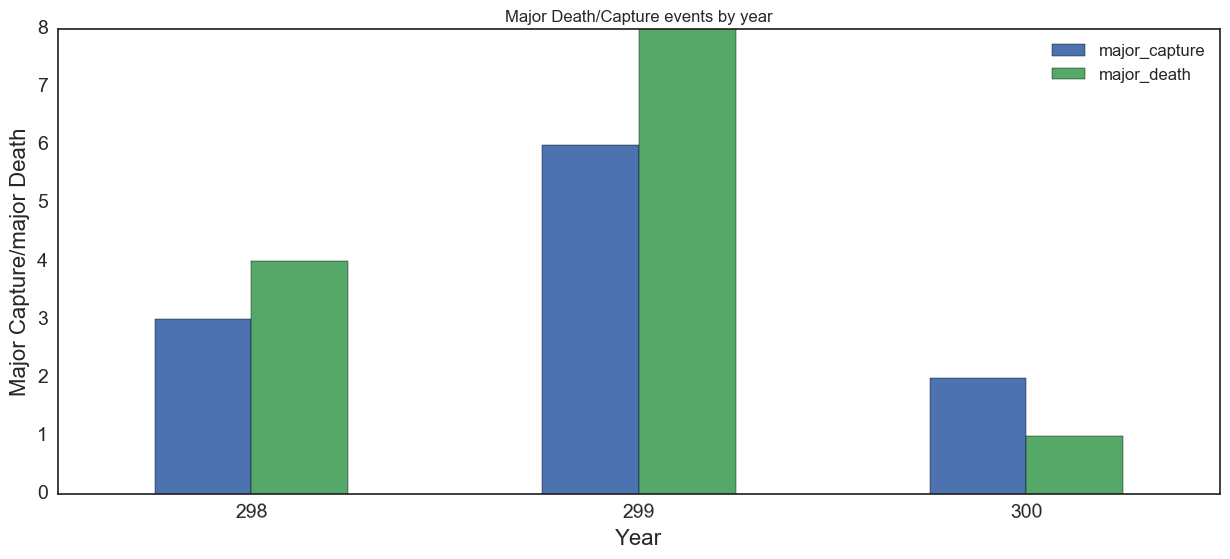

In [58]:
barplot=battles.groupby('year').sum()[['major_capture','major_death']].plot.bar(rot=1)
#year=[year for year in battles['year'].unique()]
#plt.bar(year,barplot['major_capture'],label='major capture',width=0.25,color='b')
#plt.bar(year,barplot['major_death'],label='major death',width=0.25,color='r')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Major Capture/major Death')
plt.title('Major Death/Capture events by year')
plt.show()

In [40]:
battles.groupby('year').sum()[['major_capture','major_death']]

,major_capture,major_death
year,,
298,3.0,4.0
299,6.0,8.0
300,2.0,1.0
